# Introduktion till Python, del 3

I den här notebooken kommer vi gå igenom följande:

- importer, paket
- virtuella miljöer
- iteratorer
- generatorer
- filer och kontexthanterare
- numpy
- pandas


## Virtuella miljöer

När du dyker ner i Python-världen kommer du snabbt märka att **virtuella miljöer** är din bästa vän. Tänk dig att du jobbar på flera projekt samtidigt, och alla dessa kräver olika saker. I ett projekt kanske du vill bygga en webbapplikation med ramverk som Flask eller Django, medan ett annat går ut på att extrahera, transformera och ladda data till ett data warehouse. Utan virtuella miljöer skulle det vara som att försöka laga två helt olika rätter i samma kastrull samtidigt - rörigt, eller hur? Med dessa virtuella miljöer får varje projekt sin egen lilla bubbla, så att du kan installera vad det behöver utan att stöka till det för andra projekt. Vissa paket kanske inte är kompatibla med vissa versioner av andra paket eller andra Python-versioner. Därför är det bra att kunna separera alla beroenden i en egen virtuell miljö. Som en bonus kan du genom att definiera dina beroenden i en textfil enkelt låta andra sätta upp sin miljö så att den fungerar för ert gemensamma projekt.

Med `venv` som finns med i alla moderna versioner av Python är det väldigt enkelt att sätta upp en virtuell miljö genom att i kommandotolken eller en terminal navigera till platsen där man vill skapa miljön (oftast projektmappen):

`py -m venv min_virtuella_miljo`

Vill man använda en specifik Python-version så är det bara att peka på rätt Python-installation, t ex:

`c:\program\python311\python.exe -m venv .venv`

Det är vanligt att man döper sin virtuella miljö till just `.venv`. Obs! den **virtuella miljön ska inte versionshanteras** om man samarbetar i ett projekt och man brukar därför lägga till det som ett undantag i `.gitignore`-filen om man använder git.

När miljön är skapad vill vi aktivera den genom att köra aktiveringsscriptet för miljön:

`min_virtuella_miljo\scripts\activate`

eller

`.venv\scripts\activate` om du döpt miljön till `.venv`.

Vill vi deaktivera miljön skriver vi `deactivate` i terminalen.

**Skapa nu din virtuella miljö enligt instruktionerna ovan och aktivera den sedan.**

## Importer och andra nyttigheter
Python är ett väldigt trevligt språk i grundutförande, men en av de stora fördelarna med dess popularitet är att det finns ett stort antal paket som utökar funktionaliteten eller förenklar operationer väldigt mycket. De här paketen kan utvecklas av vem som helst och använda olika typer av licensformer. Överlag hittar man paket på PyPI, [Python Packaging Index](https://pypi.org/), som indexerar och tillhandahåller paketen.

Hur kan man ladda ner och använda paket från PyPI? Det finns flera sätt, men Python-distributioner från 3.4 inkluderar pakethanteraren `pip` som gör det enkelt att hämta och installera paket från terminalen, eller från en cell i en notebook. Kör cellen nedan för att installera paketet `numpy` (det kan ta en stund). Det går även att köra i Windows kommandotolk. Se till att paketet installeras i rätt miljö!

In [ ]:
pip install numpy

Det är vanligt att alla beroenden för ett Python-projekt sparas i en `requirements.txt`-fil. Skapa en fil med just det namnet i samma mapp som dessa notebooks ligger i och lägg in följande rader i den:

`pandas`

`matplotlib`

Kör sedan cellen nedan för att installera dessa två paket.

In [21]:
pip install -r "requirements.txt"

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\source\kslpythoncourse\.venv\lib\site-packages (from -r requirements.txt (line 1)) (1.26.4)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.2/11.5 MB 4.6 MB/s eta 0:00:03
   - -------------------------------------- 0.4/11.5 MB 6.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.5 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 8.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.5 MB 9.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.5 MB 10.4 MB/s eta 0:00:01
   ----------- ---------------------------- 3.2/11.5 MB 11.3 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.5 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.2/11.5 MB 11.7 MB/s eta 0:00:01
   ----------------- ------------

Vill du få ut en lista med alla paket som är installerade i din Python-miljö för stunden? Kör då cellen nedan och öppna upp filen.

In [ ]:
pip freeze > "requirements.txt"

Observera att det anges ett versionsnummer (t ex `numpy==2.1.4`) för varje installerat paket. Det går alltså att installera en specifik version av paket om det finns behov av detta, ange det helt enkelt på det formatet:

`pip install numpy==2.1.4`

När vi sedan vill använda ett paket i vår Python-kod måste vi importera det:


In [ ]:
import numpy as np

Här importerar vi NumPy och ger den ett alias, `np`, för att förenkla hur vi refererar till paketet och dess metoder.

När vi vill referera till och använda en viss metod från ett paket anger vi, separerat med punkter, paketets namn (eller alias), eventuellt klassens namn och slutligen metodens namn, t ex `np.ndarray.min`, där `np` är paketet, `ndarray` en klass av objekt som finns i paketet och `min` är metoden.

## Generatorer

I del ett av den här kursen gick vi kort igenom iterabler och iteratorer, något som liknar det vi ska undersöka nu: generatorer. Generatorer är iteratorer som vi bara kan iterera över en gång. Det som är speciellt med generatorer är att de inte sparar alla värden i minnet utan genererar dem när de behövs. Det här är väldigt nyttigt när vi har potentiellt stora mängder data som vi inte kan hantera i primärminnet på en och samma gång, men som vi ändå vill kunna iterera över.

Generatorer definieras oftast som funktioner, men använder sig inte av `return`-värden utan har istället en `yield`-sats.

In [5]:
def generator_function():
    for i in range(5):
        yield i

for item in generator_function():
    print(item)


0
1
2
3
4


Vad händer om vi försöker iterera över generatorn med `next`? Låt oss testa!

In [13]:
generator = generator_function()
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

0
1
2
3
4


StopIteration: 

Det går alldeles utmärkt tills vi kommer till ett värde som ligger utanför intervallet som generatorn genererar värden för. Vi ser att vi får ett StopIteration-fel, vilket beror på att vi inte, som i `for`-loopens implementation har någon hantering för att generatorn är "färdig".

### Generatoruttryck
Precis som för dictionaries och listor finns det ett kompakt och smidigt sätt att skapa generatorer, se här där vi omger uttrycket som vi vill skapa en generator för med parenteser:

In [26]:
# Skapa en generator för att räkna ut kvadraten av varje värde mellan 0 och 3
# Värdena kommer inte räknas ut innan vi printar dem utan det görs "on the fly"
# På så sätt behöver vi inte allokera minne för alla värden
g = (x**2 for x in range(4))
print(next(g))
print(next(g))
print(next(g))
print(next(g))

0
1
4
9


## Arbeta med filer

I Python, som många andra programmeringsspråk, vill vi ofta interagera med filer i vårt filsystem. Den grundläggande syntaxen för att öppna en fil med Pythons inbyggda metoder är `fil = open('filväg', 'åtkomstläge')` och för att stänga den kör vi helt enkelt `fil.close()`. 

### Kontexthanterare

Kontexthanterare är en mekanism för att automatiskt hantera vissa operationer när man ska hantera olika slags resurser. De är väldigt användbara för resurser som behöver stängas eller frigöras efter användning, till exempel filer, nätverksanslutningar eller databasanslutningar. Kontexthanterare ser man oftast i form av Python's `with`-sats, som säkerställer att resurser frigörs när de inte längre behövs. Den grundläggande syntaxen för en kontexthanterare ser ut så här:

In [ ]:
with context_manager as resource:
    # Gör något med resursen

Om vi vill utföra två operationer som hör ihop, t ex att öppna och stänga en fil, tillsammans med mellanliggande operationer (att skriva något till filen) så kan det t ex se ut så här:

In [ ]:
with open('requirements.txt', 'w') as opened_file:
    opened_file.write('requests')

Vilket är samma sak som att skriva:

In [ ]:
file = open('requirements.txt', 'w')
try:
    file.write('requests')
finally:
    file.close()

Fördelen med den här konstruktionen är att oavsett hur körningen av koden i `try`-blocket går så kommer filen stängas framgångsrikt.

I bakgrunden finns det en `__enter__`-metod som initierar resursen samt en `__exit__`-metod för att städa upp, till exempel stänga filen eller frigöra resursen när koden i `with`-blocket har körts (oavsett om den lyckats eller ej). Vi kan implementera en egen enkel kontexthanterare för att öppna filer, genom att skapa en klass med dessa metoder:

In [ ]:
class File(object):
    def __init__(self, file_name, method):
        self.file_obj = open(file_name, method)
    def __enter__(self):
        return self.file_obj
    def __exit__(self, type, value, traceback):
        self.file_obj.close()

I `__exit__`-metoden finns argumenten type, value och traceback som kan användas om det uppstår ett fel i körningen och som används av `__exit__`-metoden för att avgöra hur filen ska stängas. Här görs en `close` oavsett fel.

Som vi precis såg så är det smidigt att arbeta med kontexthanterare när vi ska läsa från eller skriva till filer då det ser till att filen öppnas och stängs på ett säkert sätt. Med andra ord, använd `with`-satsen om du inte har några väldigt specifika behov.

### Åtkomstlägen
När vi öppnar filen finns det några olika lägen vi kan välja mellan:
- 'r' - read - öppnar filen för läsning och ger ett fel om filen inte finns
- 'w' - write - öppnar filen för skrivning och skapar en ny fil om den inte finns eller skriver över filen om den redan finns
- 'a' - append - öppnar filen för att lägga till innehåll i slutet av filen, eller skapar en ny fil om den inte finns
- 'r+' - read och write - öppnar filen för både läsning och skrivning
- 'b' - binary -  lägg till 'b' till ett annat läge för att öppna filen i binärt läge (t.ex., 'rb' eller 'wb+'). Med binärt läge menas att filen konverteras till ett binärt lagringsformat vilket kan vara bra för att hantera filer som inte är text (bilder t ex) 

Här nedan kommer ett exempel där vi använder en kontexthanterare för att läsa från vår `requirements`-fil:

In [5]:
with open('requirements.txt', 'r') as fil:
    innehall = fil.read()

print(innehall)

numpy
matplotlib
pandas


Ett exempel med JSON-data:

In [11]:
import json

data = [
    {
        "titel": "Den hemliga trädgården",
        "författare": "Frances Hodgson Burnett",
        "utgivningsår": 1911
    },
    {
        "titel": "Stolthet och fördom",
        "författare": "Jane Austen",
        "utgivningsår": 1813
    },
    {
        "titel": "1984",
        "författare": "George Orwell",
        "utgivningsår": 1949
    }
]

with open('böcker.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=4)


Hur gör vi för att lägga till en ny bok i listan?

In [8]:

# Steg 1: Läs in befintlig data från filen
with open('böcker.json', 'r', encoding='utf-8') as f:
    böcker = json.load(f)

# Steg 2: Lägg till en ny bok
ny_bok = {
    "titel": "Mästaren och Margarita",
    "författare": "Michail Bulgakov",
    "utgivningsår": 1967
}
böcker.append(ny_bok)

# Steg 3: Skriv tillbaka den uppdaterade datan till filen
with open('böcker.json', 'w', encoding='utf-8') as f:
    json.dump(böcker, f, ensure_ascii=False, indent=4)

# Läs in och skriv ut den uppdaterade filen för att se innehållet
with open('böcker.json', 'r', encoding='utf-8') as f:
    uppdaterade_böcker = json.load(f)
    for bok in uppdaterade_böcker:
        print(f"Titel: {bok['titel']}, Författare: {bok['författare']}, Utgivningsår: {bok['utgivningsår']}")

Titel: Den hemliga trädgården, Författare: Frances Hodgson Burnett, Utgivningsår: 1911
Titel: Stolthet och fördom, Författare: Jane Austen, Utgivningsår: 1813
Titel: 1984, Författare: George Orwell, Utgivningsår: 1949
Titel: Mästaren och Margarita, Författare: Michail Bulgakov, Utgivningsår: 1967


## NumPy

NumPy är ett paket som förenklar numeriska beräkningar och datamanipulation. NumPy, vilket står för Numerical Python, ger oss kraftfulla verktyg för att arbeta med matriser, vektorer och andra numeriska strukturer på ett effektivt sätt. Paketet ger oss tillgång till array-objekt som möjliggör vektoriserad operation, vilket innebär att du kan utföra matematiska operationer på hela arrayer istället för att loopa igenom varje enskilt element. Detta resulterar i betydande prestandaförbättringar. NumPy erbjuder också ett omfattande bibliotek av inbyggda funktioner för att utföra olika numeriska och matematiska operationer utan att behöva implementera dem från grunden.

Här följer några grundläggande exempel på hur NumPy fungerar:

In [1]:
import numpy as np

# Skapa en enkel array från en lista
simple_array = np.array([1, 2, 3])
print(simple_array)
print(type(simple_array))

[1 2 3]
<class 'numpy.ndarray'>


Vi ser att objektet som skapats är av typen `numpy.ndarray`.

In [8]:
# Utför enklare matematiska operationer på en array
result = simple_array * 2
print(result)

[2 4 6]


In [9]:
# Beräkna medelvärdet av arrayen
mean_value = np.mean(simple_array)
print(mean_value)

2.0


In [14]:
# Skapa en 2D-array
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix)

[[1 2 3]
 [4 5 6]]


In [13]:
# Transponera matrisen (rader blir kolumner och vice versa)
transposed_matrix = np.transpose(matrix)
print(transposed_matrix)

[[1 4]
 [2 5]
 [3 6]]


Vi kan skapa en array som är vertikal istället för horisontell. Det här är nyttigt om vi arbetar med matrisalgebra, där dimensionerna på matrisen eller vektorn är viktig. Med `np.array.reshape()` kan vi omforma vår array på olika sätt.

In [26]:
# Skapa en horisontell array
horizontal_array = np.array([1, 2, 3])

# Omvandla till en vertikal array med reshape-metoden
vertical_array = horizontal_array.reshape(-1, 1)

print("Horisontell array:")
print(horizontal_array)
print("\nVertikal array:")
print(vertical_array)


Horisontell array:
[1 2 3]

Vertikal array:
[[1]
 [2]
 [3]]


För att välja ut ett specifikt element från en array kan vi använda indexering med hakklamrar `numpy_matris[rad, kolumn]`.

In [16]:
print(matrix)

# Hämta ett specifikt element från arrayen
element = matrix[1, 2]
print(element)

6


In [17]:
# Skärning för att hämta delar av arrayen
sliced_array = matrix[:, 1:]
print(sliced_array)

[[2 3]
 [5 6]]


In [19]:
# Beräkna inversen av en matris
inverse_matrix = np.linalg.inv(sliced_array)
print(inverse_matrix)

[[-2.          1.        ]
 [ 1.66666667 -0.66666667]]


In [20]:
# Beräkna standardavvikelsen
std_deviation = np.std(matrix)
print(std_deviation)

1.707825127659933


### Övning
Hur beräknas max-värdet i matrisen `matrix`? Tips: [i dokumentationen finns alla metoder](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) som `numpy.ndarray` har.

In [29]:
# Skriv din kod här

### Operationer på vektorer och matriser

Låt oss titta på ett exempel av en vektoroperation med NumPy. Vi kommer att utföra en **elementvis addition** av två vektorer. Anta att vi har två vektorer, A och B, och vi vill skapa en ny vektor C där varje element i C är summan av motsvarande element i A och B.

In [2]:
# Skapa två vektorer
vector_A = np.array([1, 2, 3])
vector_B = np.array([4, 5, 6])

# Elementvis addition av vektorerna
vector_C = vector_A + vector_B

print("Vektor A:", vector_A)
print("Vektor B:", vector_B)
print("Vektor C:", vector_C)


Vektor A: [1 2 3]
Vektor B: [4 5 6]
Vektor C: [5 7 9]


Vi kan använda metoden `np.vectorize()` för att använda oss av vanliga Python-funktioner på varje element i en NumPy-array. Här kommer ett exempel med en lambda-funktion.

In [3]:
# Skapa en NumPy-array
my_array = np.array([1, 2, 3, 4, 5])

# Definiera en lambda-funktion med hjälp av np.vectorize
lambda_function = np.vectorize(lambda x: x * 2-6)

# Använd den vektoriserade funktionen på arrayen
result_array = lambda_function(my_array)

print("Ursprunglig array:", my_array)
print("Resultat efter funktion:", result_array)

Ursprunglig array: [1 2 3 4 5]
Resultat efter funktion: [-4 -2  0  2  4]


### Anpassa en linje till data
Nu ska vi ta oss an något som är lite mer komplicerat, nämligen att försöka hitta en matematisk funktion som på ett så bra sätt som möjligt beskriver sambandet mellan två variabler i ett datamaterial. Vi kommer skapa slumpmässig data runt linjen $y = 5 \cdot x +3$ och sedan, med hjälp av [minstakvadratmetoden](https://sv.wikipedia.org/wiki/Minstakvadratmetoden), försöka anpassa en rät linje till denna data, med målet att minimera "felet" eller avstånden mellan datapunkterna och den anpassade linjen. Mer om det alldeles strax, låt oss först skapa vår slumpade data och kolla på hur den ser ut.

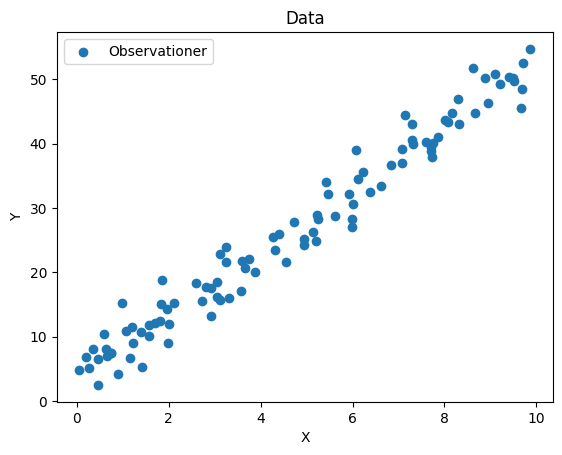

De tio första raderna av x och motsvarande y:
[[ 3.74540119 21.98814715]
 [ 9.50714306 49.63869327]
 [ 7.31993942 39.87497942]
 [ 5.98658484 26.97021747]
 [ 1.5601864  10.14191636]
 [ 1.5599452  11.87106373]
 [ 0.58083612 10.33786274]
 [ 8.66176146 44.75399663]
 [ 6.01115012 30.63026978]
 [ 7.08072578 36.89835776]]


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Skapa slumpmässig data baserad på ekvationen y = 5x + 3 med tillagt brus
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Slumpmässiga x-värden mellan 0 och 10
y = 5 * x + 3 + np.random.randn(100, 1) * 3  # y = 5x + 3 + brus från en normalfördelning

# Visualisera data
plt.scatter(x, y, label='Observationer')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data')
plt.legend()
plt.show()

print("De tio första raderna av x och motsvarande y:")
print(np.column_stack((x, y))[:10,:])


Minstakvadratmetoden kan implementeras med hjälp av lite matrisalgebra, där lösningen som minimerar kvadratfelet (avståndet mellan linjen och varje datapunkt) är $\beta = (X^T X)^{-1} X^T y$.
[Läs mer om matrismultiplikation på Wikipedia.](https://sv.wikipedia.org/wiki/Matris#Matrismultiplikation)

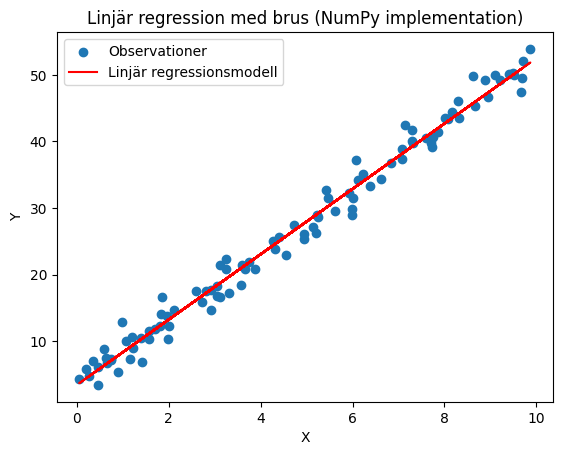

Koefficient (skärning): 3.430192315093505
Koefficient (lutning): 4.908045354575394
Medelvärde av kvadratiska felet (MSE): 3.226338255868214


In [14]:

# Lägg till en kolumn av 1:or för att hantera skärningen (intercept)
X = np.c_[np.ones_like(x), x]

# Beräkna koefficienterna med OLS-metoden
# X.T är transponatet av X och @ är ett alias för numpy.matmul eller matrismultiplikation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Beräkna förutsägelser med modellen
y_pred = X @ theta

# Visualisera resultaten
plt.scatter(x, y, label='Observationer')
plt.plot(x, y_pred, color='red', label='Linjär regressionsmodell')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linjär regression med brus (NumPy implementation)')
plt.legend()
plt.show()

# Skriv ut koefficienterna och det medelvärde av kvadratiska felet (MSE)
print(f"Koefficient (skärning): {theta[0][0]}")
print(f"Koefficient (lutning): {theta[1][0]}")
print(f"Medelvärde av kvadratfelet (MSE): {np.mean((y - y_pred)**2)}")


## Pandas

Pandas är ett paket som bygger vidare på NumPy och förenklar hanteringen av data i framför allt tabellformat, vilket underlättar dataanalys och mycket annat. Pandas baseras på två datastrukturer:
- `DataFrame`: en tvådimensionell tabell med kolumn- och radetiketter
- `Series`: en endimensionell array med etiketter

En `Series` kan ses som en kolumn i en `DataFrame` (och en `DataFrame` kan ses som en tabell bestående av en eller flera `Series`).

Pandas installeras som många andra paket i Python med `pip`:

In [ ]:
pip install pandas

Och importeras därefter oftast så här (aliaset `pd` gör allt lite mer komprimerat):

In [4]:
import pandas as pd

En `DataFrame` kan skapas på flera olika sätt:

1. Från en dictionary av listor

In [23]:
data = {
    "Namn": ["Anna", "Berit", "Carl"],
    "Ålder": [28, 34, 45],
    "Stad": ["Stockholm", "Göteborg", "Malmö"]
}

df = pd.DataFrame(data)
print(df)

    Namn  Ålder       Stad
0   Anna     28  Stockholm
1  Berit     34   Göteborg
2   Carl     45      Malmö


2. Från en lista av dictionaries

In [24]:
data = [
    {"Namn": "Anna", "Ålder": 28, "Stad": "Stockholm"},
    {"Namn": "Berit", "Ålder": 34, "Stad": "Göteborg"},
    {"Namn": "Carl", "Ålder": 45, "Stad": "Malmö"}
]

df = pd.DataFrame(data)
print(df)

    Namn  Ålder       Stad
0   Anna     28  Stockholm
1  Berit     34   Göteborg
2   Carl     45      Malmö


3. Från en lista av listor med separata kolumnnamn

In [27]:
data = [
    ["Anna", 28, "Stockholm"],
    ["Berit", 34, "Göteborg"],
    ["Carl", 45, "Malmö"]
]
columns = ["Namn", "Ålder", "Stad"] # Kolumnnamnen ligger separat

df = pd.DataFrame(data, columns=columns)
print(df)

    Namn  Ålder       Stad
0   Anna     28  Stockholm
1  Berit     34   Göteborg
2   Carl     45      Malmö


4. Från en NumPy-array

In [5]:
import numpy as np

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
columns = ['A', 'B', 'C']

df = pd.DataFrame(data, columns=columns)
print(df)

   A  B  C
0  1  2  3
1  4  5  6
2  7  8  9


Med metoderna `head`och `tail` kan vi granska de första eller sista raderna i en DataFrame

In [7]:
df.head()

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [8]:
# Visa bara sista raden
df.tail(1)

,A,B,C
2,7,8,9


För att välja en specifik kolumn använder du kolumnens namn och för att välja flera kolumner använder du en lista med kolumnnamns som argument:

In [24]:
df['A']

0    1
1    4
2    7
Name: A, dtype: int32

In [25]:
df[['A', 'C']]

,A,C
0,1,3
1,4,6
2,7,9


För att selektera rader baserade på deras position (index), kan du använda `.iloc`, som använder positionbaserad indexering, vilket betyder att du använder radernas och kolumnernas numeriska positioner.

In [29]:
df.iloc[0]  # Returnerar den första raden

A    1
B    2
C    3
Name: 0, dtype: int32

In [28]:
df.iloc[0:5]  # Returnerar de första fem raderna

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


Om du vill selektera rader baserat på indexetiketter, använder du istället `.loc`:

In [ ]:
df.loc['index_etikett']  # Returnerar raden för den specifika indexetiketten

`.loc` kan också användas för att selektera både rader och kolumner baserat på etiketter:

In [ ]:
df.loc['rad_etikett', 'kolumn_etikett']

Du kan använda booleska uttryck för att selektera rader som uppfyller vissa villkor:

In [35]:
df[df['A'] > 4]  # Returnerar alla rader där värdet i 'kolumn_namn' är större än 4

,A,B,C
2,7,8,9


#### Rad- och kolumnslice
Du kan kombinera rad- och kolumnslicear för att få en delmängd av din DataFrame:

In [ ]:
df.loc[rad_etiketter, ['kolumn_namn1', 'kolumn_namn2']]
df.iloc[rad_positioner, [kolumn_position1, kolumn_position2]]

Precis som med listor, kan du använda ett tredje argument i slicing för att ange steglängd:

In [ ]:
df.iloc[0:10:2]  # Hämtar varannan rad från de första 10 raderna

### Exempel: beräkna glidande medelvärden

Här beräknar vi centrerade glidande medelvärden för en fiktiv aktiekurs som vi skapar med lite slumpgenererade tal.

In [46]:
import pandas as pd
import numpy as np

# Skapar en datumintervall
datum = pd.date_range(start="2022-01-01", end="2023-03-31", freq='B')

# Genererar slumpmässiga stängningspriser och simulerar lite "brus"
np.random.seed(42)  # För reproducerbarhet
stängningspriser = np.random.randn(len(datum)).cumsum() + 100

# Skapar en DataFrame
df_aktier = pd.DataFrame({'Datum': datum, 'Stängningspris': stängningspriser.round(2)})

# Visar de första raderna i DataFrame
print(df_aktier.head())

# För att spara denna DataFrame till en CSV-fil kan du använda följande kommando:
# df_aktier.to_csv('aktiepriser.csv', index=False)


       Datum  Stängningspris
0 2022-01-03          100.50
1 2022-01-04          100.36
2 2022-01-05          101.01
3 2022-01-06          102.53
4 2022-01-07          102.30


Nu beräknar vi de centrerade glidande medelvärdena, två stycken serier med olika längd på det glidande medelvärdet.

In [47]:
df_aktier['MA20'] = df_aktier['Stängningspris'].rolling(window=20, center=True).mean()
df_aktier['MA50'] = df_aktier['Stängningspris'].rolling(window=50, center=True).mean()
print(df_aktier.iloc[45:55])  # Visar några rader av vårt data

        Datum  Stängningspris     MA20     MA50
45 2022-03-07           89.55  90.6680  91.9518
46 2022-03-08           89.09  90.4890  91.8096
47 2022-03-09           90.15  90.2575  91.7028
48 2022-03-10           90.49  90.1085  91.5938
49 2022-03-11           88.73  90.0430  91.5446
50 2022-03-14           89.05  90.0165  91.4540
51 2022-03-15           88.67  89.9290  91.3776
52 2022-03-16           87.99  89.8240  91.3260
53 2022-03-17           88.60  89.6690  91.2608
54 2022-03-18           89.63  89.4690  91.2094


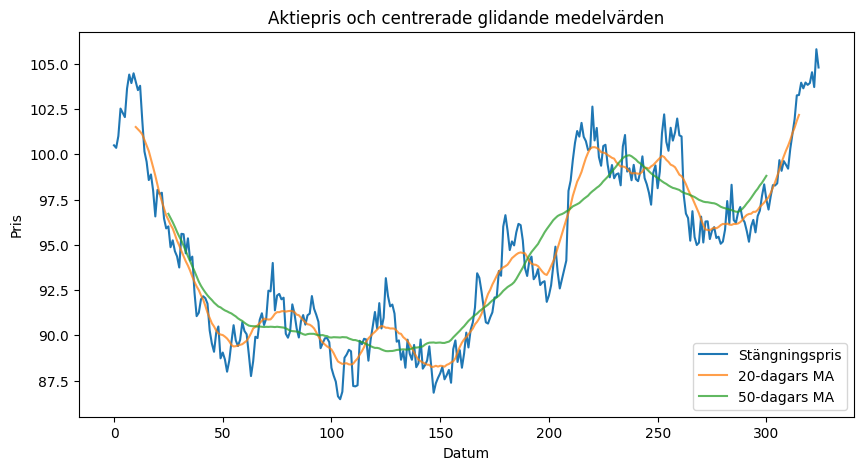

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_aktier.index, df_aktier['Stängningspris'], label='Stängningspris')
plt.plot(df_aktier.index, df_aktier['MA20'], label='20-dagars MA', alpha=0.75)  # alpha för att göra linjen lite transparent
plt.plot(df_aktier.index, df_aktier['MA50'], label='50-dagars MA', alpha=0.75)
plt.xlabel('Datum')
plt.ylabel('Pris')
plt.title('Aktiepris och centrerade glidande medelvärden')
plt.legend()
plt.show()


Det finns otroligt mycket mer intressant i Pandas att titta på, fördjupa dig gärna och bygg vidare på den här kursen!